In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:
df = pl.read_csv('data/idealo_prices.csv')
# df = pd.read_csv('data/idealo_prices.csv')

In [99]:
df.head()

,brand,perfume_name,price_100ml,price_50ml,price_150ml,price_125ml,price_75ml,price_200ml,price_30ml,price_10ml,price_250ml,price_60ml,price_90ml,price_15ml,price_70ml,price_35ml,price_33ml,price_80ml,price_180ml,price_40ml,price_5ml,price_105ml,price_18ml,price_300ml,price_20ml,price_120ml,price_25ml,price_140ml,price_400ml,price_1000ml,price_175ml,price_500ml,price_800ml,price_8ml,price_110ml,price_16ml,…,price_350ml,price_14ml,price_113ml,price_135ml,price_28ml,price_96ml,price_87ml,price_92ml,price_97ml,price_3.7ml,price_600ml,price_24ml,price_245ml,price_44ml,price_9ml,price_74ml,price_32ml,price_2ml,price_450ml,price_700ml,price_78ml,price_177ml,price_434ml,price_29ml,price_194ml,price_490ml,price_945ml,price_230ml,price_385ml,price_625ml,price_320ml,price_480ml,price_68ml,price_330ml,price_235ml,price_355ml,price_57ml
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,"""XerJoff""","""Naxos""","""167,90 €""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,"""Dior""","""Dior Homme Intense""","""97,94 €""","""72,49 €""","""113,94 €""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,"""Parfums de Marly""","""Layton""",null,null,null,"""219,95 €""","""188,99 €""","""359,99 €""","""115,00 €""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,"""Creed""","""Aventus""","""248,00 €""","""178,50 €""",null,null,"""260,10 €""",null,"""165,00 €""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,"""Prada""","""L'Homme""","""74,99 €""","""55,17 €""","""87,43 €""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [83]:
# Define the regex pattern
pattern = r"\d+\.\d\d\d,\d\d"

# Filter rows where any column matches the pattern
df_filtered = df.filter(
    pl.any_horizontal([df[col].str.contains(pattern, strict=False) for col in df.columns if df[col].dtype == pl.Utf8])
)

# Print the filtered DataFrame
print(df_filtered)

shape: (10, 102)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│      ┆ brand      ┆ perfume_na ┆ price_100m ┆ … ┆ price_330m ┆ price_235 ┆ price_355 ┆ price_57m │
│ ---  ┆ ---        ┆ me         ┆ l          ┆   ┆ l          ┆ ml        ┆ ml        ┆ l         │
│ i64  ┆ str        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆            ┆ str        ┆ str        ┆   ┆ str        ┆ str       ┆ str       ┆ str       │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 1412 ┆ Roja       ┆ NüWa       ┆ 1.020,00 € ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│      ┆ Parfums    ┆            ┆            ┆   ┆            ┆           ┆           ┆           │
│ 1622 ┆ Roja       ┆ Qatar      ┆ 1.187,06 € ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│      ┆ Parfums    ┆            ┆            ┆   ┆            ┆          

In [100]:

# Function to clean and convert price columns
def convert_price_column(series: pl.Series) -> pl.Series:
    return (
        series.str.replace("€", "")   # Remove currency symbol
              .str.replace(r"(\d)\.(\d{3})", r"${1}${2}", literal=False)  # Remove thousands separator
            #   .str.replace(".", "")   # Remove thousands separator
              .str.replace(" ", "")   # Remove thousands separator
              .str.replace(",", ".")  # Convert decimal separator
            #   .str.strip_chars()      # Trim spaces
              .cast(pl.Float64)       # Convert to float
    )

# Identify all price columns
price_columns = [col for col in df.columns if col.startswith("price")]

# Apply transformation
df = df.with_columns([convert_price_column(df[col]).alias(col) for col in price_columns])

print(df)

shape: (9_167, 102)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│      ┆ brand      ┆ perfume_na ┆ price_100m ┆ … ┆ price_330m ┆ price_235 ┆ price_355 ┆ price_57m │
│ ---  ┆ ---        ┆ me         ┆ l          ┆   ┆ l          ┆ ml        ┆ ml        ┆ l         │
│ i64  ┆ str        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆            ┆ str        ┆ f64        ┆   ┆ f64        ┆ f64       ┆ f64       ┆ f64       │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 0    ┆ XerJoff    ┆ Naxos      ┆ 167.9      ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│ 1    ┆ Dior       ┆ Dior Homme ┆ 97.94      ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│      ┆            ┆ Intense    ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2    ┆ Parfums de ┆ Layton     ┆ null       ┆ … ┆ null       ┆ null  

### 1️⃣ Price per Reference Volume (e.g., 100ml)

This method adjusts all prices to a reference volume (e.g., 100ml) using a scaling factor that accounts for non-linearity.

Steps:

1.	Estimate a scaling function: Larger bottles are often cheaper per ml than smaller ones. Use a power-law function

$$\text{price} = k \text{size}^\alpha$$ 

where $\alpha < 1$

2.	Normalize prices to a reference volume (e.g., 100ml).

### 2️⃣ Use Regression to Model Non-Linearity

If you have historical data of bottle sizes and their prices, you can fit a non-linear regression to estimate how price per ml decreases with size.
Then, use that function to compute a fair price representation for all perfumes.

This method takes the mean value of each column and then applies a regression model with
$$
k x^\alpha
$$

In [101]:
import numpy as np
import polars as pl
import re
from scipy.optimize import curve_fit

def extract_price_data_from_df(df):
    # Extract sizes from column names (in ml)
    size_pattern = re.compile(r'price_(\d+)ml')
    
    sizes = []
    prices = []
    
    for column in df.columns:
        match = size_pattern.match(column)
        if match:
            size = int(match.group(1))
            # Get the average price value from this column
            price = df.select(pl.col(column).mean()).item()
            
            sizes.append(size)
            prices.append(price)
    
    return np.array(sizes), np.array(prices)

# Define the power-law function for price modeling
def price_model(x, k, alpha):
    return k * x ** alpha

def fit_price_curve(df):
    # Extract sizes and prices from the dataframe
    sizes, prices = extract_price_data_from_df(df)
    
    # Fit the curve
    params, _ = curve_fit(price_model, sizes, prices)
    k_opt, alpha_opt = params
    
    print(f"Fitted model: price = {k_opt:.4f} * size^{alpha_opt:.4f}")
    
    # Function to adjust prices based on the fitted model
    def adjusted_price(size, reference_size, price):
        """
        Adjust a price from one size to another using the fitted power-law model.
        
        Parameters:
        size: The size you want to adjust from
        reference_size: The size you want to adjust to
        price: The original price at 'size'
        
        Returns:
        Adjusted price for the reference_size
        """
        return price * (reference_size / size) ** alpha_opt
    
    return k_opt, alpha_opt, adjusted_price

# Example usage:
# k, alpha, adjust_func = fit_price_curve(your_polars_dataframe)
# new_price = adjust_func(100, 150, original_price)

In [102]:
# Assuming your Polars dataframe is named 'df'
k, alpha, adjust_price_func = fit_price_curve(df)

# Example: Adjust a price from 100ml to 75ml
original_price = df.select(pl.col("price_100ml")).row(0)[0]  # Get a price from the 100ml column
adjusted = adjust_price_func(150, 50, original_price)
print(f"Original price for 100ml: ${original_price:.2f}")
print(f"Adjusted price for 50ml: ${adjusted:.2f}")

Fitted model: price = 56.5176 * size^0.0003
Original price for 100ml: $167.90
Adjusted price for 50ml: $167.84


This method takes into account every row of the dataframe individuvally to preserve the row relationship of each bottle size

In [103]:
import numpy as np
import polars as pl
import re
from scipy.optimize import curve_fit

def extract_price_data_from_df(df):
    # Extract sizes from column names (in ml)
    size_pattern = re.compile(r'price_(\d+)ml')
    
    sizes = []
    prices = []
    
    for column in df.columns:
        match = size_pattern.match(column)
        if match:
            size = int(match.group(1))
            # Get the average price value from this column

            for row in df.iter_rows(named=True):  # Iterate over each row
                price = row[column]  # Get the price value for the current row

                if price is not None:  # Ensure it's not missing
                    sizes.append(size)
                    prices.append(price)
    
    return np.array(sizes), np.array(prices)

# Define the power-law function for price modeling
def price_model(x, k, alpha):
    return k * x ** alpha

def fit_price_curve(df):
    # Extract sizes and prices from the dataframe
    sizes, prices = extract_price_data_from_df(df)
    
    # Fit the curve
    params, _ = curve_fit(price_model, sizes, prices)
    k_opt, alpha_opt = params
    
    print(f"Fitted model: price = {k_opt:.4f} * size^{alpha_opt:.4f}")
    
    # Function to adjust prices based on the fitted model
    def adjusted_price(size, reference_size, price):
        """
        Adjust a price from one size to another using the fitted power-law model.
        
        Parameters:
        size: The size you want to adjust from
        reference_size: The size you want to adjust to
        price: The original price at 'size'
        
        Returns:
        Adjusted price for the reference_size
        """
        return price * (reference_size / size) ** alpha_opt
    
    return k_opt, alpha_opt, adjusted_price

# Example usage:
# k, alpha, adjust_func = fit_price_curve(your_polars_dataframe)
# new_price = adjust_func(100, 150, original_price)

In [104]:
# Assuming your Polars dataframe is named 'df'
k, alpha, adjust_price_func = fit_price_curve(df)

# Example: Adjust a price from 100ml to 75ml
original_price = df.select(pl.col("price_100ml")).row(44)[0]  # Get a price from the 100ml column
adjusted = adjust_price_func(150, 50, original_price)
print(f"Original price for 100ml: ${original_price:.2f}")
print(f"Adjusted price for 50ml: ${adjusted:.2f}")

Fitted model: price = 30.9315 * size^0.2195
Original price for 100ml: $304.90
Adjusted price for 50ml: $239.58


Now we want to get the predicted price per 100ml also for the other brands

In [105]:
size_pattern = re.compile(r"price_(\d+)ml")

def compute_adjusted_price(row):
    price_per_100ml_list = []

    for column in df.columns:
        match = size_pattern.match(column)
        if match:
            size = int(match.group(1))
            price = row[column]
            if price is not None:
                estimated_price = adjust_price_func(size, 100, price)
                price_per_100ml_list.append(estimated_price)

    return np.mean(price_per_100ml_list) if price_per_100ml_list else None


In [106]:
# Apply the function to each row
df = df.with_columns(pl.Series("adjusted_price_100ml", [compute_adjusted_price(row) for row in df.iter_rows(named=True)]))

print(df)

shape: (9_167, 103)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│      ┆ brand      ┆ perfume_na ┆ price_100m ┆ … ┆ price_235m ┆ price_355 ┆ price_57m ┆ adjusted_ │
│ ---  ┆ ---        ┆ me         ┆ l          ┆   ┆ l          ┆ ml        ┆ l         ┆ price_100 │
│ i64  ┆ str        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ml        │
│      ┆            ┆ str        ┆ f64        ┆   ┆ f64        ┆ f64       ┆ f64       ┆ ---       │
│      ┆            ┆            ┆            ┆   ┆            ┆           ┆           ┆ f64       │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 0    ┆ XerJoff    ┆ Naxos      ┆ 167.9      ┆ … ┆ null       ┆ null      ┆ null      ┆ 167.9     │
│ 1    ┆ Dior       ┆ Dior Homme ┆ 97.94      ┆ … ┆ null       ┆ null      ┆ null      ┆ 95.526437 │
│      ┆            ┆ Intense    ┆            ┆   ┆            ┆       

In [107]:
df = df.sort("adjusted_price_100ml", descending=True)

In [110]:
df[['brand', 'perfume_name', 'adjusted_price_100ml']]

brand,perfume_name,adjusted_price_100ml
str,str,f64
"""Roja Parfums""","""Roja Dove Haute Parfumerie""",1672.358972
"""Roja Parfums""","""Chypré Extraordinaire""",1654.236576
"""Boadicea the Victorious""","""Valiant""",1080.0
"""Boadicea the Victorious""","""Hanuman""",1080.0
"""The Spirit of Dubai""","""Dubai - Oud""",1019.343695
…,…,…
"""Malizia""","""Uomo Musk""",2.653088
"""Malizia""","""Tattoo""",2.470116
"""Malizia""","""Uomo Skyline""",2.37863


In [111]:
prices = df['adjusted_price_100ml'].to_numpy()

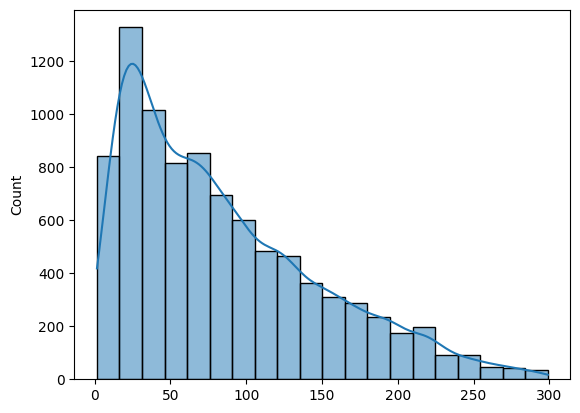

In [121]:
import matplotlib.pyplot as plt
import numpy as np

filtered_prices = prices[prices<300]

sns.histplot(filtered_prices,kde=True, bins=20)
plt.show()